# 「Ted talks」の再生数を本文からディープラーニングを使って予測してみた

In [2]:
from logging import getLogger, StreamHandler, DEBUG
logger = getLogger(__name__)
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)
logger.propagate = False

from bs4 import BeautifulSoup
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
english_stemmer = nltk.stem.SnowballStemmer('english')
import re
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
print("load first libraries")

load first libraries


In [311]:
base_dir = os.path.dirname(os.path.abspath(__file__))
import os 
os.chdir(basedir)

## 要約統計

In [501]:
df = pd.read_csv("data/ted_data.csv",index_col=0)
df = df.drop_duplicates(["English_title"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 2452
Data columns (total 6 columns):
views                  2416 non-null int64
speaker                2416 non-null object
English_title          2416 non-null object
English_transcript     2416 non-null object
Japanse_title          2416 non-null object
Japanese_transcript    2416 non-null object
dtypes: int64(1), object(5)
memory usage: 132.1+ KB


In [502]:
df["views"].describe()

count    2.416000e+03
mean     1.829111e+06
std      2.690208e+06
min      1.731190e+05
25%      8.329560e+05
50%      1.200113e+06
75%      1.807558e+06
max      4.908272e+07
Name: views, dtype: float64

In [315]:
df["views"].astype(np.int64)

0       49082718
1       44997173
2       44997173
3       36347978
4       32613736
5       24735233
6       24594346
7       22675149
8       21723298
9       21400541
10      20997930
11      19525096
12      18875360
13      18428643
14      17551379
15      16979927
16      16855335
17      16359945
18      16200403
19      16074195
20      15341607
21      15110314
22      14178900
23      14058403
24      13939105
25      13652679
26      12930044
27      12227810
28      11986651
29      11559930
30      11362359
31      11283598
32      10819699
33      10469838
34      10373163
35      10337947
36      10224620
37      49082946
38      44997355
39      36348240
40      32613922
41      24735424
42      24594416
43      22675194
44      21723341
45      21400600
46      20997989
47      19525189
48      18875674
49      18428736
50      17551425
51      16980056
52      16855449
53      16359959
54      16200419
55      16074213
56      15341685
57      15110389
58      141789

/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


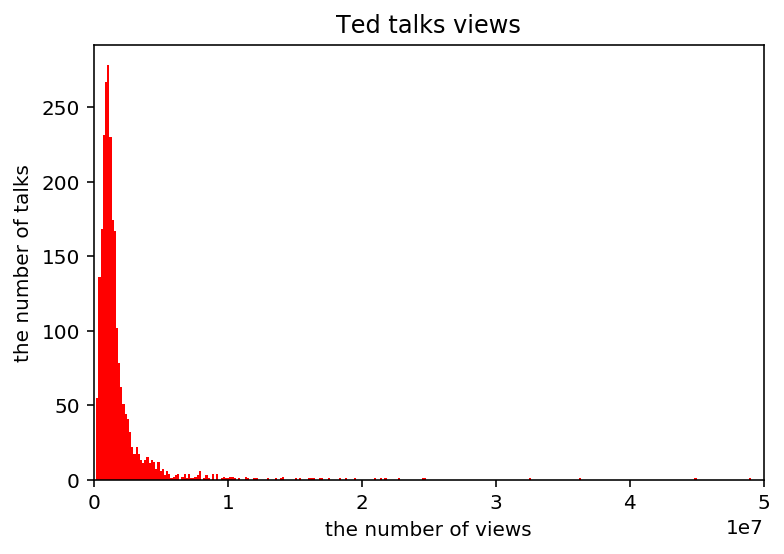

In [506]:
x = df["views"].astype(np.int64)
%config inlineBackend.figure_format = 'retina'
plt.hist(x,color="red",bins=300)
plt.title("Ted talks views")
plt.xlabel("the number of views")
plt.ylabel("the number of talks")
plt.xlim([0,50000000])
plt.xticks([0,10000000,20000000,30000000,40000000,50000000])
plt.show()

ERROR:root:Line magic function `%cofig` not found.
/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


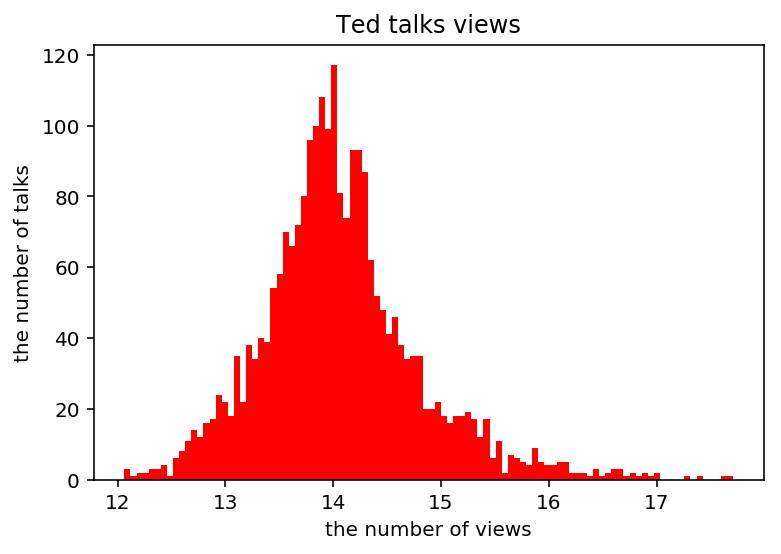

In [507]:
x = df["views"].astype(np.int64)
x = np.log(x)
%cofig inlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.hist(x,color="red",bins=100)
plt.title("Ted talks views")
plt.xlabel("the number of views")
plt.ylabel("the number of talks")
# plt.xticks(0,20000,10)
plt.show()

ERROR:root:Line magic function `%cofig` not found.


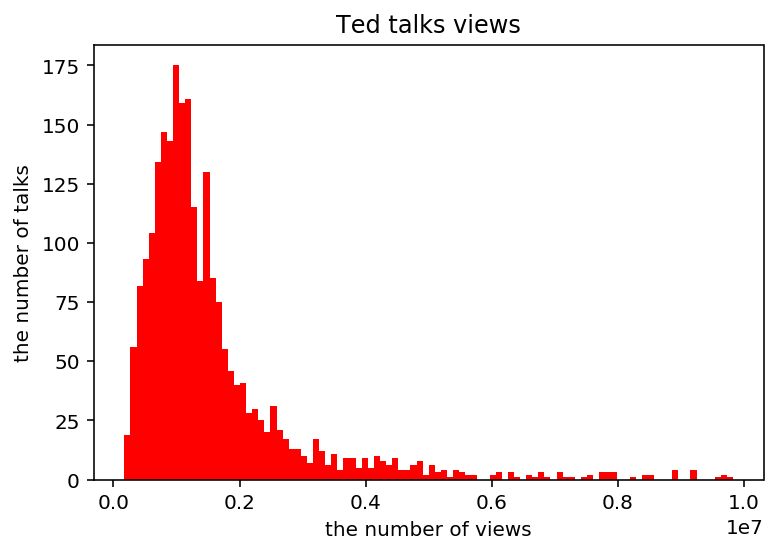

In [8]:
y = x[x < 10000000]
%cofig inlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.hist(y,color="red",bins=100)
plt.title("Ted talks views")
plt.xlabel("the number of views")
plt.ylabel("the number of talks")
# plt.xticks(0,20000,10)
plt.show()

In [ ]:
y = x[x < 10000000]
%cofig inlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.hist(y,color="red",bins=100)
plt.title("Ted talks views")
plt.xlabel("the number of views")
plt.ylabel("the number of talks")
# plt.xticks(0,20000,10)
plt.show()

ERROR:root:Line magic function `%cofig` not found.


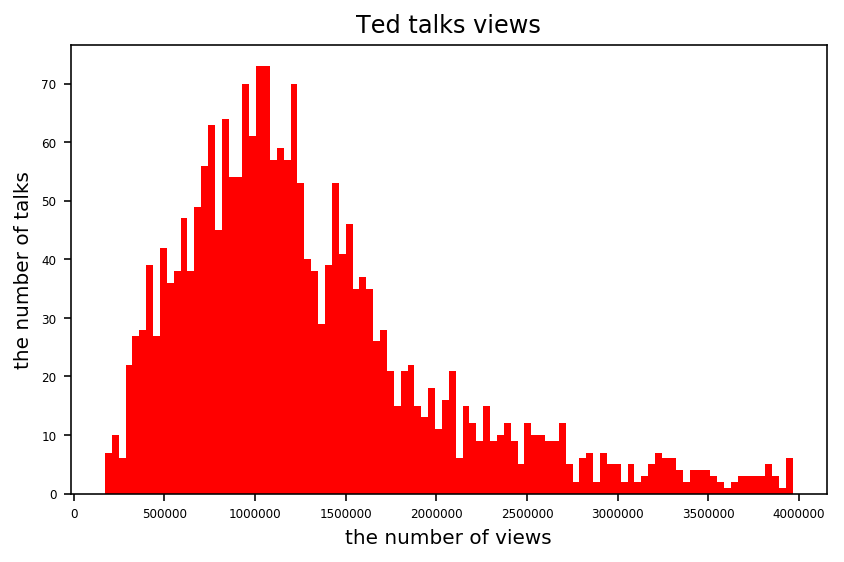

In [9]:
u = y[y < 4000000]
%cofig inlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.hist(u,color="red",bins=100)
plt.title("Ted talks views")
plt.xlabel("the number of views")
plt.ylabel("the number of talks")
plt.tick_params(labelsize=6)
plt.tight_layout()
# plt.xticks(0,10)
plt.show()

In [ ]:
u = y[y < 4000000]
%cofig inlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.hist(u,color="red",bins=100)
plt.title("Ted talks views")
plt.xlabel("the number of views")
plt.ylabel("the number of talks")
plt.tick_params(labelsize=6)
plt.tight_layout()
# plt.xticks(0,10)
plt.show()

ERROR:root:Line magic function `%cofig` not found.


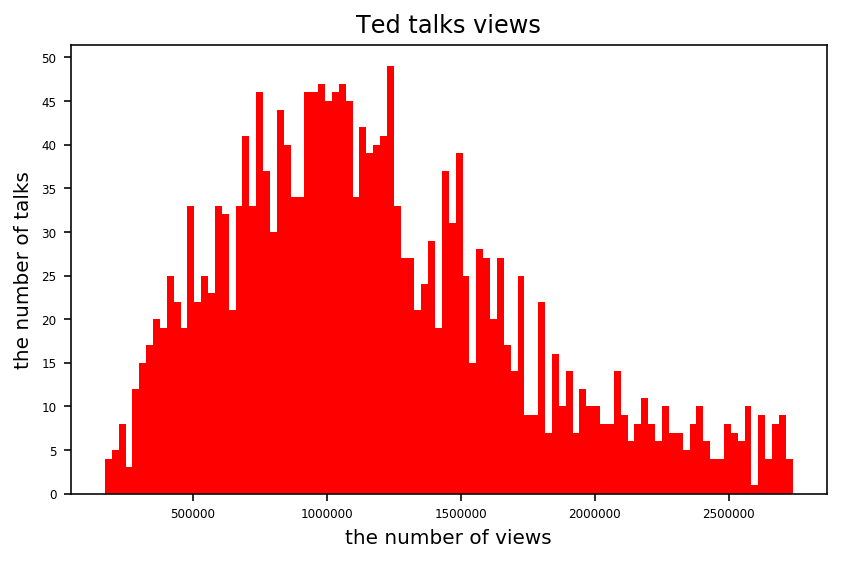

In [10]:
b = u[u < 2750000]
%cofig inlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.hist(b,color="red",bins=100)
plt.title("Ted talks views")
plt.xlabel("the number of views",fontsize=10)
plt.ylabel("the number of talks",fontsize=10)
plt.tick_params(labelsize=6)
plt.tight_layout()
# plt.xticks(np.arange(0,2750000,25000))
plt.yticks(np.arange(0,51,5))

# plt.xticks(0,10)
plt.show()

### グラフの形状が正規分布近くなるように、logをとる

In [319]:
df_comp = df
df_comp["views"] = np.log(df_comp["views"])
df_comp["views"].describe()

count    2416.000000
mean       14.067720
std         0.736093
min        12.061734
25%        13.632736
50%        13.997926
75%        14.407487
max        17.709018
Name: views, dtype: float64

In [320]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 2452
Data columns (total 6 columns):
views                  2416 non-null float64
speaker                2416 non-null object
English_title          2416 non-null object
English_transcript     2416 non-null object
Japanse_title          2416 non-null object
Japanese_transcript    2416 non-null object
dtypes: float64(1), object(5)
memory usage: 132.1+ KB


### 再生数に応じて、カテゴリー値に変換する

In [321]:
views_list = list(df_comp["views"])

#### logをとったviews

In [335]:
print(np.array(views_list))

[ 17.70901756  17.62211022  17.40864913  17.30024411  17.02373922
  17.01802714  16.93678013  16.89389588  16.87892676  16.85993442
  16.78721117  16.75336793  16.7294167   16.68064308  16.64754244
  16.64017778  16.61034653  16.60054668  16.59272575  16.54607911
  16.53088811  16.4672655   16.45873085  16.45020876  16.42944632
  16.37506415  16.31922342  16.29930417  16.26305537  16.24581661
  16.23886072  16.19687901  16.16400911  16.15473255  16.15133186
  16.1403091   16.13829702  16.12728084  16.10038066  16.08242029
  16.08111865  16.07333225  16.03745702  16.03699156  16.03489207
  16.02945087  16.00598227  16.00413896  16.00129483  15.99731722
  15.95609623  15.95406075  15.9489616   15.94723331  15.92318089
  15.89143906  15.88792106  15.88603597  15.88156096  15.8783794
  15.87602129  15.86266661  15.86063494  15.85800955  15.83316326
  15.83279408  15.82768733  15.79884943  15.78430458  15.77167736
  15.76596024  15.76547434  15.75032538  15.72900259  15.72860098
  15.725581

In [336]:
print(len(views_list))
print(max(views_list))
print(min(views_list))

2416
17.7090175552
12.0617344983


#### 最小値を0に合わしておく

In [337]:
views_list_mod = []
for view in views_list:
    add = view - min(views_list)
    views_list_mod.append(add)


In [329]:
print(len(views_list_mod))
print(views_list_mod[-1])

2416
0.0


#### 最小値を引いたもの

In [355]:
np.array(views_list_mod)

array([ 5.64728306,  5.56037573,  5.34691464,  5.23850961,  4.96200472,
        4.95629264,  4.87504563,  4.83216138,  4.81719226,  4.79819992,
        4.72547667,  4.69163343,  4.6676822 ,  4.61890858,  4.58580794,
        4.57844328,  4.54861203,  4.53881218,  4.53099125,  4.48434461,
        4.46915362,  4.405531  ,  4.39699635,  4.38847426,  4.36771183,
        4.31332966,  4.25748893,  4.23756967,  4.20132087,  4.18408211,
        4.17712623,  4.13514451,  4.10227461,  4.09299805,  4.08959736,
        4.0785746 ,  4.07656252,  4.06554634,  4.03864616,  4.02068579,
        4.01938415,  4.01159776,  3.97572252,  3.97525706,  3.97315757,
        3.96771637,  3.94424778,  3.94240446,  3.93956033,  3.93558272,
        3.89436174,  3.89232625,  3.8872271 ,  3.88549881,  3.86144639,
        3.82970456,  3.82618657,  3.82430147,  3.81982646,  3.8166449 ,
        3.81428679,  3.80093211,  3.79890045,  3.79627505,  3.77142876,
        3.77105958,  3.76595283,  3.73711493,  3.72257008,  3.70

### 5段階にカテゴリー分け

In [667]:
category_num = 5

### view数によるカテゴリー分け

In [560]:
category_num_plus = category_num
range_threshold = max(views_list_mod)/category_num_plus
print(range_threshold)
print(max(views_list_mod))

1.12945661139
5.64728305696


In [561]:
categorical_views_list = []
for view in views_list_mod:
    for i in range(1,category_num_plus+1):
        print(i)
        print(view)
        if view <= range_threshold*i:
            categorical_views_list.append(i)
            break

1
5.64728305696
2
5.64728305696
3
5.64728305696
4
5.64728305696
5
5.64728305696
1
5.56037572526
2
5.56037572526
3
5.56037572526
4
5.56037572526
5
5.56037572526
1
5.34691463625
2
5.34691463625
3
5.34691463625
4
5.34691463625
5
5.34691463625
1
5.238509609
2
5.238509609
3
5.238509609
4
5.238509609
5
5.238509609
1
4.96200472417
2
4.96200472417
3
4.96200472417
4
4.96200472417
5
4.96200472417
1
4.9562926388
2
4.9562926388
3
4.9562926388
4
4.9562926388
5
4.9562926388
1
4.87504562677
2
4.87504562677
3
4.87504562677
4
4.87504562677
5
4.87504562677
1
4.83216138484
2
4.83216138484
3
4.83216138484
4
4.83216138484
5
4.83216138484
1
4.81719226176
2
4.81719226176
3
4.81719226176
4
4.81719226176
5
4.81719226176
1
4.79819992112
2
4.79819992112
3
4.79819992112
4
4.79819992112
5
4.79819992112
1
4.72547667217
2
4.72547667217
3
4.72547667217
4
4.72547667217
5
4.72547667217
1
4.69163342748
2
4.69163342748
3
4.69163342748
4
4.69163342748
5
4.69163342748
1
4.6676821987
2
4.6676821987
3
4.6676821987
4
4.667682

1
2.9271890329
2
2.9271890329
3
2.9271890329
1
2.92563571219
2
2.92563571219
3
2.92563571219
1
2.92472885469
2
2.92472885469
3
2.92472885469
1
2.92389937994
2
2.92389937994
3
2.92389937994
1
2.92189699791
2
2.92189699791
3
2.92189699791
1
2.92166189155
2
2.92166189155
3
2.92166189155
1
2.91583783921
2
2.91583783921
3
2.91583783921
1
2.91581969429
2
2.91581969429
3
2.91581969429
1
2.91196457766
2
2.91196457766
3
2.91196457766
1
2.91049843883
2
2.91049843883
3
2.91049843883
1
2.90930351038
2
2.90930351038
3
2.90930351038
1
2.90667291442
2
2.90667291442
3
2.90667291442
1
2.90441200929
2
2.90441200929
3
2.90441200929
1
2.89642150158
2
2.89642150158
3
2.89642150158
1
2.89251698255
2
2.89251698255
3
2.89251698255
1
2.88931894118
2
2.88931894118
3
2.88931894118
1
2.88089578904
2
2.88089578904
3
2.88089578904
1
2.87937621102
2
2.87937621102
3
2.87937621102
1
2.87628682456
2
2.87628682456
3
2.87628682456
1
2.87407971373
2
2.87407971373
3
2.87407971373
1
2.87191937014
2
2.87191937014
3
2.8719193

1
2.46337516215
2
2.46337516215
3
2.46337516215
1
2.46297865944
2
2.46297865944
3
2.46297865944
1
2.45655668921
2
2.45655668921
3
2.45655668921
1
2.45459275419
2
2.45459275419
3
2.45459275419
1
2.45173315404
2
2.45173315404
3
2.45173315404
1
2.45148581584
2
2.45148581584
3
2.45148581584
1
2.45139323491
2
2.45139323491
3
2.45139323491
1
2.44874458059
2
2.44874458059
3
2.44874458059
1
2.44768544969
2
2.44768544969
3
2.44768544969
1
2.44737014037
2
2.44737014037
3
2.44737014037
1
2.44536502686
2
2.44536502686
3
2.44536502686
1
2.44521528251
2
2.44521528251
3
2.44521528251
1
2.44438000897
2
2.44438000897
3
2.44438000897
1
2.44304472853
2
2.44304472853
3
2.44304472853
1
2.44174988147
2
2.44174988147
3
2.44174988147
1
2.43727130986
2
2.43727130986
3
2.43727130986
1
2.43724505735
2
2.43724505735
3
2.43724505735
1
2.43720668706
2
2.43720668706
3
2.43720668706
1
2.4351127704
2
2.4351127704
3
2.4351127704
1
2.43498425332
2
2.43498425332
3
2.43498425332
1
2.43473324321
2
2.43473324321
3
2.4347332

2
2.21865847286
1
2.21860947136
2
2.21860947136
1
2.21741195789
2
2.21741195789
1
2.21529504593
2
2.21529504593
1
2.2150409925
2
2.2150409925
1
2.21363970259
2
2.21363970259
1
2.21260940799
2
2.21260940799
1
2.21228576109
2
2.21228576109
1
2.21222316884
2
2.21222316884
1
2.21216183728
2
2.21216183728
1
2.20890967626
2
2.20890967626
1
2.2082008414
2
2.2082008414
1
2.20744830489
2
2.20744830489
1
2.20740701013
2
2.20740701013
1
2.20649300649
2
2.20649300649
1
2.20625642441
2
2.20625642441
1
2.20552342789
2
2.20552342789
1
2.20345006029
2
2.20345006029
1
2.20335693189
2
2.20335693189
1
2.20295880588
2
2.20295880588
1
2.20263521175
2
2.20263521175
1
2.20222274872
2
2.20222274872
1
2.20160565206
2
2.20160565206
1
2.20147911937
2
2.20147911937
1
2.20129760008
2
2.20129760008
1
2.2004611631
2
2.2004611631
1
2.20002220147
2
2.20002220147
1
2.19985065973
2
2.19985065973
1
2.19968933244
2
2.19968933244
1
2.19948187339
2
2.19948187339
1
2.19908412321
2
2.19908412321
1
2.19857789985
2
2.1985778998

2.03962470243
1
2.03880687064
2
2.03880687064
1
2.03847819653
2
2.03847819653
1
2.03752992683
2
2.03752992683
1
2.0371880282
2
2.0371880282
1
2.03716693812
2
2.03716693812
1
2.03591957259
2
2.03591957259
1
2.03587884683
2
2.03587884683
1
2.03552959302
2
2.03552959302
1
2.0346291174
2
2.0346291174
1
2.0343572303
2
2.0343572303
1
2.03376637628
2
2.03376637628
1
2.03266533857
2
2.03266533857
1
2.03082050264
2
2.03082050264
1
2.03080155194
2
2.03080155194
1
2.03066358002
2
2.03066358002
1
2.03045886133
2
2.03045886133
1
2.03041942922
2
2.03041942922
1
2.0296509509
2
2.0296509509
1
2.02876643216
2
2.02876643216
1
2.02814566312
2
2.02814566312
1
2.02751918481
2
2.02751918481
1
2.02713200142
2
2.02713200142
1
2.02367952512
2
2.02367952512
1
2.02356194642
2
2.02356194642
1
2.02219962178
2
2.02219962178
1
2.02124573089
2
2.02124573089
1
2.020809407
2
2.020809407
1
2.01977754758
2
2.01977754758
1
2.01875306182
2
2.01875306182
1
2.01852286825
2
2.01852286825
1
2.01708372516
2
2.01708372516
1
2.01

1
1.83470237686
2
1.83470237686
1
1.83454004563
2
1.83454004563
1
1.83393106874
2
1.83393106874
1
1.83237372378
2
1.83237372378
1
1.83215184034
2
1.83215184034
1
1.83035091515
2
1.83035091515
1
1.82994419396
2
1.82994419396
1
1.82978664928
2
1.82978664928
1
1.82869613056
2
1.82869613056
1
1.82817177615
2
1.82817177615
1
1.82783195905
2
1.82783195905
1
1.82695216921
2
1.82695216921
1
1.82649292183
2
1.82649292183
1
1.82596927128
2
1.82596927128
1
1.82596741057
2
1.82596741057
1
1.82575805927
2
1.82575805927
1
1.82512229317
2
1.82512229317
1
1.82485874598
2
1.82485874598
1
1.82485315766
2
1.82485315766
1
1.82427552901
2
1.82427552901
1
1.82408819389
2
1.82408819389
1
1.82361364097
2
1.82361364097
1
1.82357260813
2
1.82357260813
1
1.82303902802
2
1.82303902802
1
1.82280013068
2
1.82280013068
1
1.82223718982
2
1.82223718982
1
1.82182061499
2
1.82182061499
1
1.82174867755
2
1.82174867755
1
1.82154591692
2
1.82154591692
1
1.82109072377
2
1.82109072377
1
1.82048285342
2
1.82048285342
1
1.8197

1
1.51141910744
2
1.51141910744
1
1.51007387037
2
1.51007387037
1
1.50839712432
2
1.50839712432
1
1.507317821
2
1.507317821
1
1.50668043401
2
1.50668043401
1
1.50599908152
2
1.50599908152
1
1.50571205732
2
1.50571205732
1
1.50278329395
2
1.50278329395
1
1.5013890564
2
1.5013890564
1
1.50120755967
2
1.50120755967
1
1.50070151187
2
1.50070151187
1
1.49992069166
2
1.49992069166
1
1.49988073231
2
1.49988073231
1
1.49859989879
2
1.49859989879
1
1.49715715896
2
1.49715715896
1
1.4964537631
2
1.4964537631
1
1.49574987214
2
1.49574987214
1
1.4951309705
2
1.4951309705
1
1.49491724394
2
1.49491724394
1
1.49488097066
2
1.49488097066
1
1.49437559881
2
1.49437559881
1
1.4935937131
2
1.4935937131
1
1.4931292196
2
1.4931292196
1
1.49085554053
2
1.49085554053
1
1.49065520907
2
1.49065520907
1
1.490370253
2
1.490370253
1
1.48906153552
2
1.48906153552
1
1.48836806777
2
1.48836806777
1
1.48528858658
2
1.48528858658
1
1.4851159177
2
1.4851159177
1
1.48378065196
2
1.48378065196
1
1.4832801226
2
1.483280122

### 数によるカテゴリー分け

In [586]:
views_list_mod

[5.6472830569632713,
 5.5603757252555113,
 5.3469146362534694,
 5.2385096090038736,
 4.9620047241665333,
 4.9562926388040935,
 4.8750456267739857,
 4.8321613848404041,
 4.8171922617629086,
 4.7981999211171846,
 4.7254766721678436,
 4.6916334274817011,
 4.667682198700561,
 4.6189085820043729,
 4.5858079413792723,
 4.5784432835772151,
 4.5486120289915739,
 4.5388121781529449,
 4.5309912507900663,
 4.4843446089336254,
 4.4691536166893151,
 4.4055310037278197,
 4.3969963549748421,
 4.3884742592217698,
 4.3677118257908383,
 4.3133296553976912,
 4.2574889254794286,
 4.2375696736074815,
 4.2013208675433908,
 4.1840821098664911,
 4.1771262265212954,
 4.1351445138582221,
 4.1022746116641855,
 4.092998049879597,
 4.0895973597245536,
 4.0785745971049074,
 4.0765625239914876,
 4.06554633939475,
 4.0386461647424277,
 4.0206857873422024,
 4.0193841525139575,
 4.011597755187271,
 3.9757225174717803,
 3.9752570569282319,
 3.9731575713662117,
 3.967716369676392,
 3.9442477765803616,
 3.9424044622138936

In [668]:
category_num_plus = category_num+1
range_threshold = len(views_list_mod)/category_num
print(range_threshold)
print(len(views_list_mod))

483.2
2416


In [669]:
categorical_views_list = []
for i,view in enumerate(views_list_mod):
    for j in range(1,category_num_plus):
          if j == category_num:
            categorical_views_list.append(j)
            break
          if i <= range_threshold*j:
            categorical_views_list.append(j)
            break

In [670]:
print(len(categorical_views_list))
print(len(views_list_mod))

2416
2416


In [544]:
# print(categorical_views_list)

In [671]:
add_categorical_views = pd.Series(categorical_views_list)
df_comp["categorical_views"] = add_categorical_views.values

In [672]:
pd.set_option("display.max_rows",None)
print(df_comp["categorical_views"])

0       1
1       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      1
95      1
96      1
97      1
98      1
99      1
100     1
101     1
102     1
103     1
104     1
105     1
106     1
107     1
108     1
109     1
110     1
111     1
112     1
113     1
114     1
115     1
116     1
117     1
118     1
119     1
120     1
121     1
122     1
123     1
124     1
125     1
126     1
127     1
128     1
129     1
130     1
131     1
132     1
133     1
134     1
135     1
136     1


In [636]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2416 entries, 0 to 2452
Data columns (total 7 columns):
views                  2416 non-null float64
speaker                2416 non-null object
English_title          2416 non-null object
English_transcript     2416 non-null object
Japanse_title          2416 non-null object
Japanese_transcript    2416 non-null object
categorical_views      2416 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 151.0+ KB


### 英文を単語ベクトルを作成するための関数を定義

In [24]:
def review_to_wordlist(review, remove_stopwords=True):
    review_text = BeautifulSoup(review,"lxml").get_text()
    review_text = re.sub("[^a-zA-Z]", " ", review)
    words = review_text.lower().split()
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
    b = []
    stemmer = english_stemmer
    for word in words:
        b.append(stemmer.stem(word))
    return (b)

### テストデータと訓練データを作成

In [673]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_comp,test_size=0.2)

### 訓練データ概要

In [674]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 143 to 324
Data columns (total 7 columns):
views                  1932 non-null float64
speaker                1932 non-null object
English_title          1932 non-null object
English_transcript     1932 non-null object
Japanse_title          1932 non-null object
Japanese_transcript    1932 non-null object
categorical_views      1932 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 120.8+ KB


### テストデータ概要

In [675]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484 entries, 1024 to 522
Data columns (total 7 columns):
views                  484 non-null float64
speaker                484 non-null object
English_title          484 non-null object
English_transcript     484 non-null object
Japanse_title          484 non-null object
Japanese_transcript    484 non-null object
categorical_views      484 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 30.2+ KB


### 英文を単語ベクトルに変換

In [676]:
clean_train_ted_English_script = []
for ted_script in train['English_transcript']:
    clean_train_ted_English_script.append(" ".join(review_to_wordlist(ted_script)))

In [677]:
clean_test_ted_English_script = []
for ted_script in test['English_transcript']:
    clean_test_ted_English_script .append(" ".join(review_to_wordlist(ted_script)))

### 英文の単語ベクトルをtfidf値に変換する

In [678]:
from sklearn.feature_extraction.text import TfidfVectorizer
English_tfidf_vectorizer = TfidfVectorizer(min_df=2,max_df=0.95,max_features=2000000,ngram_range=(1,3),sublinear_tf=True)
English_tfidf_vectorizer = English_tfidf_vectorizer.fit(clean_train_ted_English_script)
English_tfidf_train_features = English_tfidf_vectorizer.transform(clean_train_ted_English_script)
English_tfidf_test_features = English_tfidf_vectorizer.transform(clean_test_ted_English_script)

## モデルを作成

### TFIDF

### SVM

### 英文モデル作成

In [679]:
from sklearn.svm import LinearSVC
model_svm_tfidf = LinearSVC(C=1.0)
model_svm_tfidf.fit(English_tfidf_train_features,train["categorical_views"])
pred_svm_tfidf = model_svm_tfidf.predict(English_tfidf_test_features.toarray())

### 英文精度を出力(SVM-TFIDF)

In [680]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(test["categorical_views"],pred_svm_tfidf))

0.318181818182


### 評価数値テーブル

In [681]:
print(np.array(pred_svm_tfidf))

[3 2 2 5 4 1 2 2 1 5 4 4 1 5 2 2 5 4 5 3 1 1 3 5 1 5 1 5 2 1 4 2 5 1 2 3 4
 1 3 3 1 5 1 5 1 3 3 2 1 1 1 5 1 1 1 3 1 1 5 4 4 1 5 3 2 1 3 5 1 1 2 4 2 1
 2 3 4 1 1 2 5 5 3 2 1 1 4 3 1 1 2 2 1 1 3 1 5 5 1 4 2 4 2 4 1 5 4 1 1 1 4
 1 1 4 2 2 3 4 1 1 5 4 4 4 5 1 5 5 3 4 5 5 4 2 1 4 3 1 5 2 5 5 5 5 1 3 1 1
 1 4 3 4 5 2 2 5 4 3 4 3 2 1 1 4 5 3 4 4 1 4 5 1 5 1 1 3 5 5 5 3 3 4 1 3 4
 5 2 3 4 5 4 3 4 2 1 1 4 1 1 5 5 4 1 2 5 3 1 5 1 4 3 1 4 5 2 4 5 1 3 1 4 1
 1 3 5 1 1 1 5 5 1 5 3 1 5 1 5 1 3 3 3 2 2 1 2 3 3 1 3 1 2 4 5 1 3 3 5 2 3
 4 5 1 1 1 2 5 4 3 4 5 5 4 1 4 1 4 3 5 2 5 1 3 1 3 2 3 4 1 1 1 1 4 2 2 3 1
 5 5 5 5 5 2 1 2 1 2 5 5 1 2 5 3 1 4 5 5 5 3 5 4 3 2 4 4 2 4 5 1 5 4 5 3 3
 1 5 5 4 3 3 1 4 3 2 2 1 3 2 1 5 4 5 5 3 2 3 1 2 3 1 1 1 5 1 1 1 1 4 1 1 1
 5 2 1 2 1 2 3 3 2 2 2 5 5 2 3 4 3 1 1 5 2 5 4 5 1 1 1 1 3 2 4 4 4 5 1 1 3
 4 4 3 3 4 2 1 4 5 1 5 2 1 3 5 5 5 2 2 5 4 5 1 3 1 2 5 3 5 5 3 1 5 5 5 3 5
 2 1 1 1 4 1 2 2 3 2 1 1 3 1 1 1 5 2 5 1 2 1 5 5 4 5 1 5 1 1 4 1 2 2 5 5 3
 1 3 1]


In [682]:
print(classification_report(test['categorical_views'],pred_svm_tfidf))

             precision    recall  f1-score   support

          1       0.35      0.48      0.40       107
          2       0.31      0.24      0.27        95
          3       0.28      0.25      0.27        87
          4       0.25      0.18      0.21       108
          5       0.35      0.45      0.39        87

avg / total       0.31      0.32      0.31       484



### 精度の記録

In [ ]:
#category_num = 6
0.493801652893
#category_num = 5
0.599173553719

#### 誤差ヒストグラムを作成(English SVM TFIDF)

/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


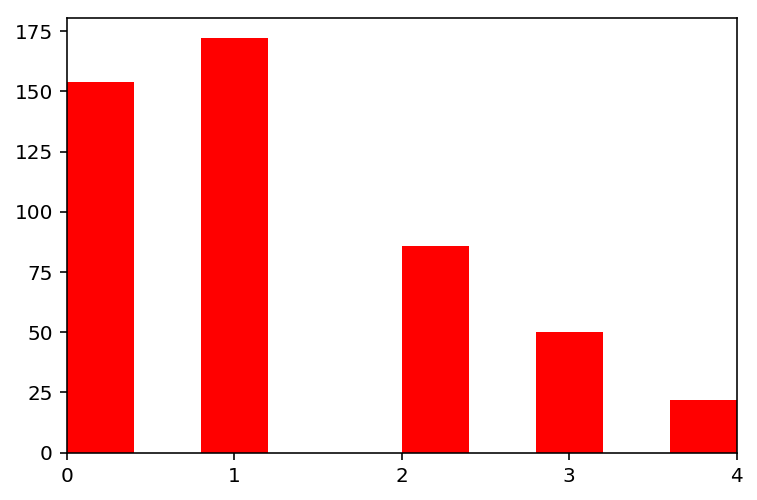

In [702]:
diff_svm_en = abs(pred_svm_tfidf -np.array(test["categorical_views"]))
plt.hist(list(diff_svm_en),color="red",bins=10)
plt.xlim([0,4])
plt.xticks([0,1,2,3,4])
plt.show()

### Gradient Boosting Classifier

### 英文モデル作成

In [380]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
model_gbc = GradientBoostingClassifier()
model_gbc.fit(English_tfidf_train_features,train["categorical_views"])
pred_gbc_tfidf = model_gbc.predict(English_tfidf_test_features.toarray())


### 英文精度を出力(GBC-TFIDF)

In [383]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(test["categorical_views"],pred_gbc_tfidf))

0.471074380165


#### 誤差テーブルを作成(English GBC TFIDF)

/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


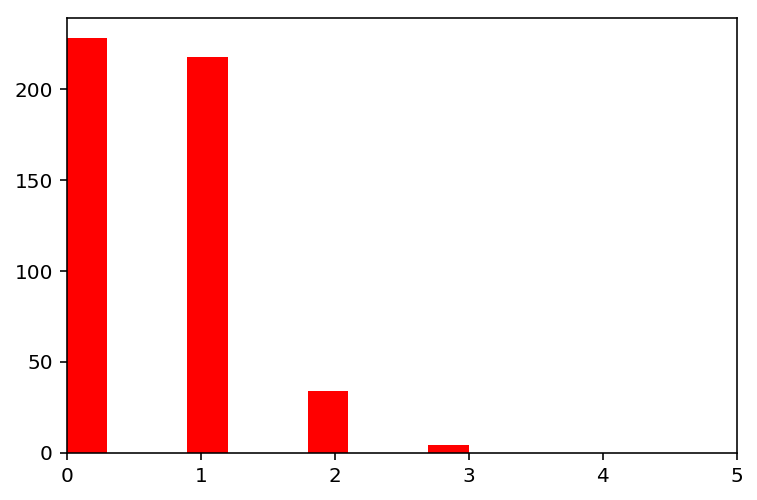

In [397]:
diff_gbc_en = abs(pred_gbc_tfidf -np.array(test["categorical_views"]))
plt.hist(list(diff_gbc_en),color="red",bins=10)
plt.xlim([0,5])
plt.xticks([0,1,2,3,4,5])
plt.show()

### 英文精度を出力(GBC-TFIDF)

In [179]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(test["categorical_views"],pred_gbc_tfidf))

0.31914893617


## ディープラーニング

### MLP

In [47]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

Using TensorFlow backend.


### 前処理

### TFIDF MLP専用

### 英文TFIDF

In [715]:
feature_num = 800

In [716]:
from sklearn.feature_extraction.text import TfidfVectorizer
English_tfidf_vectorizer = TfidfVectorizer(min_df=2,max_df=0.95,max_features=feature_num,ngram_range=(1,3),sublinear_tf=True)
English_tfidf_vectorizer = English_tfidf_vectorizer.fit(clean_train_ted_English_script)
English_tfidf_train_features_mlp = English_tfidf_vectorizer.transform(clean_train_ted_English_script)
English_tfidf_test_features_mlp = English_tfidf_vectorizer.transform(clean_test_ted_English_script)

### 英文特徴量調整

In [717]:
nb_classes = 5
# X_train = English_tfidf_train_features_mlp.toarray()
# X_test = English_tfidf_test_features_mlp.toarray()

X_train_en = English_tfidf_train_features.toarray()
X_test_en = English_tfidf_test_features.toarray()

y_train_en = np.array(train['categorical_views']-1)
y_test_en = np.array(test['categorical_views']-1)

Y_train_en = np_utils.to_categorical(y_train_en,nb_classes)
Y_test_en = np_utils.to_categorical(y_test_en,nb_classes)

In [ ]:
np.set_printoptions(threshold=1000000)
print(English_tfidf_test_features.toarray())

### 英文特徴量正規化

In [718]:
scale = np.max(X_train_en)

X_train_en /= scale
X_test_en /= scale

mean = np.mean(X_train_en)

X_train_en -= mean
X_test_en -= mean

input_dim = X_train_en.shape[1]
logger.debug(input_dim)

267191


### モデルのセッティング(MLP)

### 英文モデル レイヤー設定

In [719]:
#define the sequential model_en
model_en = Sequential()

model_en.add(Dense(256,input_dim=input_dim)) #set 256 nodes
model_en.add(Activation('relu'))#activation1

model_en.add(Dropout(0.4))
model_en.add(Dense(128))# set 128 nodes 
model_en.add(Activation('relu'))#activation2

model_en.add(Dropout(0.2))
model_en.add(Dense(nb_classes))#set final output nodes
model_en.add(Activation('softmax'))#activation3

# model_en.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_en.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_en.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

### 英文モデルの作成

### ハイパラメーター

In [720]:
batch_size = 16
epoch_num = 3

In [721]:
model_en.fit(X_train_en,Y_train_en,epochs=epoch_num,batch_size=batch_size,validation_split=0.1)


Train on 1738 samples, validate on 194 samples
Epoch 1/3
1738/1738 [==============================] - 107s 62ms/step - loss: 1.6025 - acc: 0.2348 - val_loss: 1.5699 - val_acc: 0.2680
Epoch 2/3
1738/1738 [==============================] - 105s 60ms/step - loss: 0.8399 - acc: 0.7606 - val_loss: 1.5458 - val_acc: 0.2526
Epoch 3/3
1738/1738 [==============================] - 101s 58ms/step - loss: 0.0616 - acc: 0.9919 - val_loss: 1.6291 - val_acc: 0.2835


In [57]:
# np.set_printoptions(threshold=100000)
# X_test

### 英文モデル精度

In [722]:
pred_mlp_en = model_en.predict_classes(X_test_en,verbose=0)
print(accuracy_score(test["categorical_views"],pred_mlp_en+1))

0.285123966942


### 精度テーブル

In [723]:
print(classification_report(test['categorical_views'],pred_mlp_en+1))

             precision    recall  f1-score   support

          1       0.48      0.22      0.31       107
          2       0.33      0.05      0.09        95
          3       0.23      0.37      0.29        87
          4       0.24      0.44      0.32       108
          5       0.34      0.33      0.34        87

avg / total       0.33      0.29      0.27       484



In [ ]:
category number  6
features 2000:
    0.471074380165


category number 5 features 800
0.590909090909

category number 5 features 1000
0.597107438017

category number 5 features 2000
0.592975206612

In [516]:
pred_mlp_en+1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [513]:
np.array(test["categorical_views"])

array([2, 2, 2, 4, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 4, 3, 2, 3, 2, 2, 3, 2, 4, 2, 2, 2, 3, 3, 4, 2, 2, 2, 3, 5, 3, 3,
       3, 2, 2, 4, 4, 2, 5, 2, 5, 4, 2, 2, 3, 2, 4, 2, 4, 5, 2, 1, 3, 2, 2,
       2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 4, 2, 1, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 2, 1, 3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 4, 3, 3, 2, 3,
       2, 1, 2, 2, 2, 2, 1, 2, 5, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 4, 3,
       2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 3, 5, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3,
       3, 1, 2, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 1, 3, 2, 3, 1, 2, 2, 1, 4, 3,
       2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 2, 2, 4, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 2, 1, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3,
       4, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 1, 2, 4, 4, 3, 2, 2, 3, 3, 3, 1, 1, 2, 3, 1, 3, 2, 2, 2,
       2, 2,

In [514]:
diff = abs((pred_mlp_en+1)-np.array(test["categorical_views"]))
diff

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 3, 1, 1,
       1, 0, 0, 2, 2, 0, 3, 0, 3, 2, 0, 0, 1, 0, 2, 0, 2, 3, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0,

/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['IPAGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


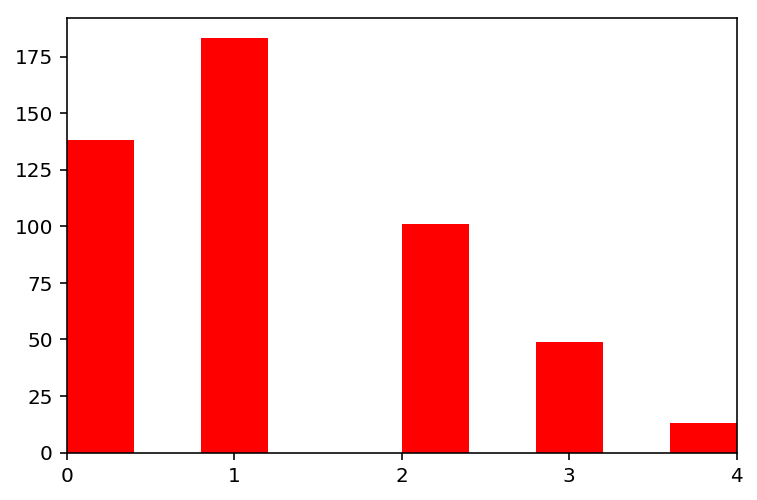

In [729]:
diff = abs((pred_mlp_en+1)-np.array(test["categorical_views"]))
plt.hist(list(diff),color="red",bins=10)
plt.xlim([0,4])
plt.xticks([0,1,2,3,4])
plt.show()

### LSTM

In [236]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

### 初期パラメーター

In [ ]:
max_features  = 3000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.1
maxlen = 80
batch_size = 16
nb_classes = 5

### LSTM学習用単語ベクトル

In [238]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(train["English_transcript"])
sequences_train = tokenizer.texts_to_sequences(train["English_transcript"])
sequences_test = tokenizer.texts_to_sequences(test["English_transcript"])

### データの前処理

In [239]:
X_train = sequence.pad_sequences(sequences_train,maxlen=maxlen)
X_test = sequence.pad_sequences(sequences_test,maxlen=maxlen)

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (1690, 80)
X_test shape: (423, 80)


### モデルのチューニング

In [240]:
model_lstm = Sequential()

model_lstm.add(Embedding(max_features,256,dropout=0.2))
model_lstm.add(LSTM(256,dropout_W=0.2,dropout_U=0.2))
model_lstm.add(Dense(nb_classes))
model_lstm.add(Activation('softmax'))
# model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model_lstm.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_lstm.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])


/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/arthur-lawrence/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(256, dropout=0.2, recurrent_dropout=0.2)`
  after removing the cwd from sys.path.


### ディープラーニングを実行する

In [244]:
print('Train...')
model_lstm.fit(X_train,Y_train,batch_size=batch_size,epochs=10,validation_data=(X_test,Y_test))

Train...
Train on 1690 samples, validate on 423 samples
Epoch 1/10
1690/1690 [==============================] - 27s 16ms/step - loss: 0.0565 - acc: 0.8041 - val_loss: 0.1971 - val_acc: 0.3073
Epoch 2/10
1690/1690 [==============================] - 27s 16ms/step - loss: 0.0518 - acc: 0.8237 - val_loss: 0.2091 - val_acc: 0.2861
Epoch 3/10
1690/1690 [==============================] - 26s 16ms/step - loss: 0.0448 - acc: 0.8491 - val_loss: 0.2186 - val_acc: 0.2766
Epoch 4/10
1690/1690 [==============================] - 26s 15ms/step - loss: 0.0393 - acc: 0.8751 - val_loss: 0.2210 - val_acc: 0.2742
Epoch 5/10
1690/1690 [==============================] - 26s 16ms/step - loss: 0.0318 - acc: 0.8941 - val_loss: 0.2207 - val_acc: 0.2719
Epoch 6/10
1690/1690 [==============================] - 30s 18ms/step - loss: 0.0294 - acc: 0.9083 - val_loss: 0.2292 - val_acc: 0.2648
Epoch 7/10
1690/1690 [==============================] - 30s 18ms/step - loss: 0.0267 - acc: 0.9130 - val_loss: 0.2339 - val_acc:

### 精度検証

In [245]:
score,accuracy = model_lstm.evaluate(X_test,Y_test,batch_size=batch_size)
print('Test score:',score)
print('Test accuracy',accuracy)

423/423 [==============================] - 1s 3ms/step
Test score: 0.233433530897
Test accuracy 0.286052009668
